# Explore OpenCV

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Idea from Project 1

In [ ]:
#Normalize Each Color Channel, rather than the Greyscale
def normalize(img):
    r = img[:,:,2]  
    g = img[:,:,1]
    b = img[:,:,0]
    
    sum=b+g+r

    normalized_r = r/sum*255
    normalized_b = b/sum*255
    normalized_g = g/sum*255

    return np.stack((normalized_b, normalized_g , normalized_r), axis=3)

#Create a greyscale conversion function that weights colors more realistically.

def grayscale(img):
    height, width, channel = img.shape
    gray = np.zeros_like(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            gray[i][j] = 0.299 * img[i,j][2] + 0.587 * img[i,j][1] +  0.114 * img[i,j][0]
            
    return gray

img = cv2.imread('../images/zebra.ascii.ppm')
plt.figure(figsize=(3,3)); plt.imshow(grayscale(img));

## Rotation

In [ ]:
#for rotation, first specify a rotation matrix using cv2.getRotationMatrix2D(center, angle, scale)
#cv2.getRotationMatrix2D has three arguments

import cv2
 
#My rotation
# let's 90 degree be rotating to the right and -90 be rotating to the left
def my_simple_rotate(img, angle = 180):
    #height = img.shape[0]
    #width = img.shape[1]
    #channel = img.shape[2]
    height, width, channel = img.shape

    if (angle == 180):
        output = np.zeros([height,width,channel], dtype=np.uint8)
    else:
        output = np.zeros([width,height,channel], dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            
            if (angle == 90):
                output[j][i] = img[i-1][j-1]
                output = output[0:width,0:height]
            """
            if (angle == -90):
                output[j][i] = img[height-j-1][width-i-1]
                output = output[0:height,0:width]
            """ 
            if (angle == 180):
                output[i][j] = img[height-i-1][width-j-1]
                output = output[0:height,0:width]
    return output

#Rotate using OpenCV
def rotate_opencv(img, angle = 180, scale = 1):
    height = img.shape[0]
    width = img.shape[1]
    
    # calculate the center of the image
    center = (width/ 2, height/ 2)
 
    if angle == 180:
        matrix = cv2.getRotationMatrix2D(center, angle, scale)
        output = cv2.warpAffine(img, matrix, (width, height))
    elif angle == 90:
        matrix = cv2.getRotationMatrix2D(center, angle, scale)
        output = cv2.warpAffine(img, matrix, (height, width))
    return output
 
# read image as grey scale
img = cv2.imread('../images/zebra.ascii.ppm')
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(3,3)); plt.imshow(img);
plt.figure(figsize=(3,3)); plt.title("My image 180"); plt.imshow(my_simple_rotate(img, 180));
plt.figure(figsize=(3,3)); plt.title("OpenCV 180"); plt.imshow(rotate_opencv(img, 180));

plt.figure(figsize=(3,3)); plt.title("My image 90"); plt.imshow(my_simple_rotate(img, 90));
plt.figure(figsize=(3,3)); plt.title("OpenCV 90"); plt.imshow(rotate_opencv(img, 90));


In [ ]:
#cv2.transpose()
plt.figure(figsize=(3,3)); plt.imshow(cv2.transpose(img));

#cv2.flip()
#horizontal
plt.figure(figsize=(3,3)); plt.imshow(cv2.flip(img, 0));

#vertical
plt.figure(figsize=(3,3)); plt.imshow(cv2.flip(img, 1));

#both
plt.figure(figsize=(3,3)); plt.imshow(cv2.flip(img, -1));

## Cropping

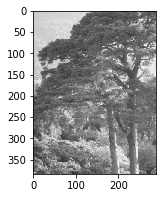

In [5]:
img = cv2.imread('../images/project3/foliage.ascii.pgm')

height, width, c = img.shape

start_h, start_w = int(height * .10), int(width * .10)
end_h, end_w = int(height * .70), int(width * .70)
cropped = img[start_h:end_h , start_w:end_w]

plt.figure(figsize=(3,3)); plt.imshow(cropped);

# Idea from Project 3 - Live sketching

In [3]:
#Work but not sure why it freezes python... Jupyter's kernel would die after running this....

"""
def sketch(img):
    #Convert img to Grayscale 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #Find edges with Canny
    gray = cv2.GaussianBlur(img, (5,5), 0)
    edges = cv2.Canny(gray, 15, 80)
    
    #Do some thresholding, using adaptiveThreshold() then no nead to specify threshold val
    my_sketch = cv2.adaptiveThreshold(edges, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                               cv2.THRESH_BINARY, 3, 5)
    return my_sketch

capture = cv2.VideoCapture(0)

while (True):
    response, img = capture.read()
    cv2.imshow("My sketch", sketch(img))
    if cv2.waitKey(1) == 13: #the Enter key
        break

capture.release()
cv2.destroyAllWindows()
"""

In [10]:
capture.release()
cv2.destroyAllWindows()

## Drawing

In [ ]:
#line
image = np.zeros((512,512,3), np.uint8)
cv2.line(image, (0,0), (511,511), (255,127,0), 5)
cv2.imshow("Blue Line", image)

